In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16846429485187510345, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2871308014
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4899010019971191749
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [33]:
import os
import numpy as np
np.random.seed(777)

import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from PIL import Image
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img_height, img_width = 224, 224

nb_train_samples = 386
nb_validation_samples = 199
nb_test_samples = 155

In [5]:
train_dir = 'data_reduced/train/'
validation_dir = 'data_reduced/validation'
test_dir = 'data_reduced/test'

In [6]:
random_seed = np.random.seed(777)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size = 1,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size = 1,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 386 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Found 155 images belonging to 2 classes.


In [7]:
X_train, y_train = [], []
for _ in tqdm(range(nb_train_samples)):
    x, y = train_generator.next()
    X_train.append(x[0])
    y_train.append(y[0])
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
y_train = np.argmax(y_train, axis=1)
# np.save('data/npy/X_train.npy', X_train)
# np.save('data/npy/y_train.npy', y_train)

100%|███████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 594.46it/s]


In [8]:
X_train = np.array([x.flatten() for x in X_train])

In [9]:
X_validation, y_validation = [], []
for _ in tqdm(range(nb_validation_samples)):
    x_val, y_val = validation_generator.next()
    X_validation.append(x_val[0])
    y_validation.append(y_val[0])
X_validation = np.asarray(X_validation)
y_validation = np.asarray(y_validation)
y_validation = np.argmax(y_validation, axis=1)
# np.save('data/npy/X_validation.npy', X_validation)
# np.save('data/npy/y_validation.npy', y_validation)

100%|███████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 548.77it/s]


In [10]:
X_validation = np.array([x.flatten() for x in X_validation])

In [11]:
X_test, y_test = [], []
for _ in tqdm(range(nb_test_samples)):
    x_t, y_t = test_generator.next()
    X_test.append(x_t[0])
    y_test.append(y_t[0])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test, axis=1)
# np.save('data/npy/X_test.npy', X_test)
# np.save('data/npy/y_test.npy', y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 601.38it/s]


In [12]:
X_test = np.array([x.flatten() for x in X_test])

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# plt.imshow(X_train[0])
# plt.show()

X_train shape: (386, 150528)
y_train shape: (386,)
X_validation shape: (199, 150528)
y_validation shape: (199,)
X_test shape: (155, 150528)
y_test shape: (155,)


____

In [18]:
scoring = 'accuracy'
"""Build Models: Let’s evaluate 6 different algorithms,
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM)."""
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100)))

----------------model training accuracy--------------
LR: 0.885830 (0.037410)
LDA: 0.823684 (0.082653)
KNN: 0.940216 (0.040442)
CART: 0.917139 (0.030014)
NB: 0.914507 (0.011815)
SVM: 0.953104 (0.030672)


[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

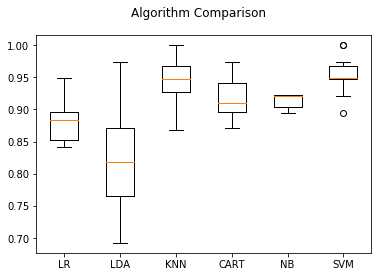

In [24]:
'''Evaluate each model in turn'''
print("----------------model training accuracy--------------")
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [34]:
save_dir = "models"

print("---------------model validation accuracy-------------")
for name, model in models:
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("%s: %f" % (name, accuracy_score(y_test, predictions)))
    joblib.dump(model, save_dir + name + '.pkl')
    print("Confusion matrix:")
    print(confusion_matrix(y_test, predictions))
    print("classification report:")
    print(classification_report(y_test, predictions))

---------------model validation accuracy-------------
LR: 0.541935
Confusion matrix:
[[38 71]
 [ 0 46]]
classification report:
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       109
           1       0.39      1.00      0.56        46

   micro avg       0.54      0.54      0.54       155
   macro avg       0.70      0.67      0.54       155
weighted avg       0.82      0.54      0.53       155

LDA: 0.567742
Confusion matrix:
[[48 61]
 [ 6 40]]
classification report:
              precision    recall  f1-score   support

           0       0.89      0.44      0.59       109
           1       0.40      0.87      0.54        46

   micro avg       0.57      0.57      0.57       155
   macro avg       0.64      0.65      0.57       155
weighted avg       0.74      0.57      0.58       155

KNN: 0.503226
Confusion matrix:
[[32 77]
 [ 0 46]]
classification report:
              precision    recall  f1-score   support

           0    